# CreateBathymetryFromEarthRecon-RK2021

This jupyter-notebook is used to show how ExoCcycle classes, functions, and methods are used to generate reconstructed bathymetry models (as shown) and carbon cycle model parameters. Note that ocean basins must be define for the ocean basin volume correction to be applied.

Note that this model differs in three ways compared to the CreateBathymetryFromEarthRecon bathymetry:

    1) This model uses the Rosas and Korenaga (2021) [https://doi.org/10.1038/s41561-020-00673-1] thermal subsidence relationship for subsidence of ocean lithosphere. Subsidence is described with an analytical solution to convection simulations for Earth scenarios with different (higher) internal heating.
    
    2) The ocean volume correction is removed since Rosas and Korenaga description of seafloor subsidence describes deep time. Amongst other changes one would expect 1) basin volume (due to water cycling) was significantly different than present-day and 2) the correction distribution (bulit on a comparison with etopo and H~2.1e-12 W/m/K) is not applicable. While it would still be most appropriate to have a ocean basin volume correction, such a method has not been formulated yet and would depend on the poorly constrained values (i.e. expected surface water and depth of mid-ocean-ridge).
    
    3) Eustatic sea-level evolution is not used to modify the depth of pelagic ocean seafloor.
    
Note that this model is similar to CreateBathymetryFromEarthRecon bathymetry but might lead to inappropriate representation of seafloor depths

    1) The isostatic correction described in Hoggard et al. (2017) with seafloor sediment thickness defined by globSed (Straume et al., 2019) are applied to global seafloor simulations.


### Thermal subsidence relationship described in Rosas korenaga (2021)
![image-8.png](attachment:image-8.png)
<center>Figure 1: Bathymetric evolution of oceanic lithosphere at present and in
the early earth. a, At present, seafloor subsides as the plate moves away
from mid-ocean ridge. Hotspot volcanism forms oceanic islands that
eventually become seamounts as the plate subsides. Low concentration
of heat-producing elements in the mantle lead to a moderate increase in
temperature (yellow–red shading). b, In the early Earth, the concentration
of heat-producing elements in the mantle was considerably higher than
present, leading to a greater temperature increase. As at present, oceanic
islands may become seamounts, but additional heating can lead to seafloor
shallowing and allow seamounts to resurface.</center>
<br>
<br>


![image-9.png](attachment:image-9.png)
<center>Figure 2: a–c, Seafloor subsidence as a function of time1/2 for different values of asthenospheric viscosity (η0) and heat production (H) at different ages, based on the geochemical model of the depleted mantle24. HSC bathymetry and onset time of sublithospheric convection (circles) are shown. d, Depth-dependent radiogenic heating due to mantle melting at present, 2.5 Ga and 4 Ga. The oceanic lithosphere (OL; 2.5 Ga model only) is divided into the depleted lithospheric mantle (with no heat production) and oceanic crust. e, Viscosity profiles with a linearly exponential form of temperature-dependent viscosity in the upper mantle (Methods). For the lower mantle (LM), we explore 10-fold (dashed line) and 30-fold (dotted line) increases in viscosity with respect to the upper mantle. f, Seafloor subsidence with depth-dependent radiogenic heating and viscosity. Colour coding and line type are as in d and e.</center>
<br>
<br>


### Reconstructed bathymetry (Present-day w/ H=8e-12W/m/K) - basin definitions
![image-5.png](attachment:image-5.png)
<center>Figure 3: Outdated. This is from the CreateBathymetryFromEarthRecon jupyter-notebook.</center>
<br>
<br>

## (areaofBasin2/areaofBasin1)*np.nansum( areaofConnection*self.bathymetryConDist[ symmeticIndex[0], symmeticIndex[1] ]/100 )
### 8 Basins
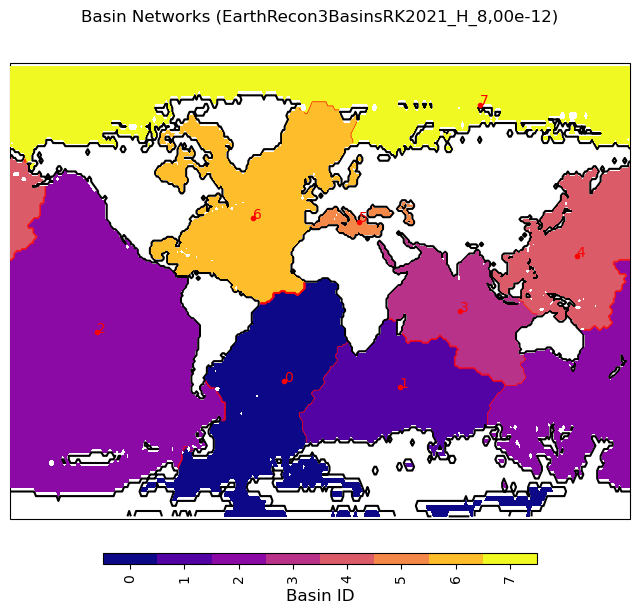

### 7 Basins
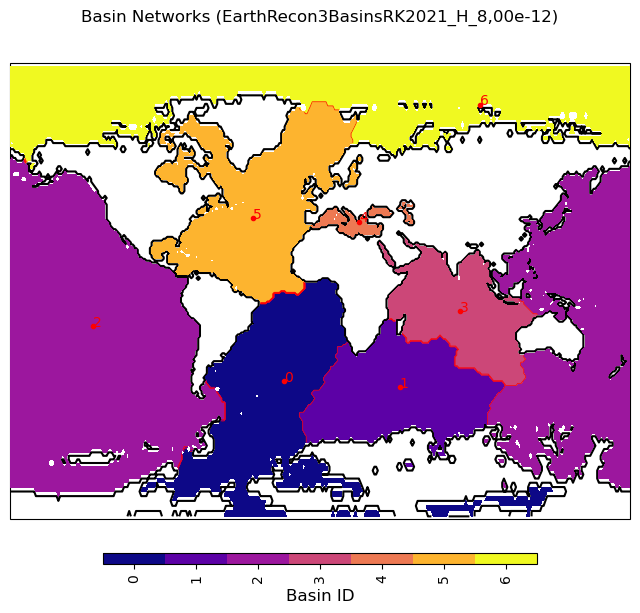

### 6 Basins
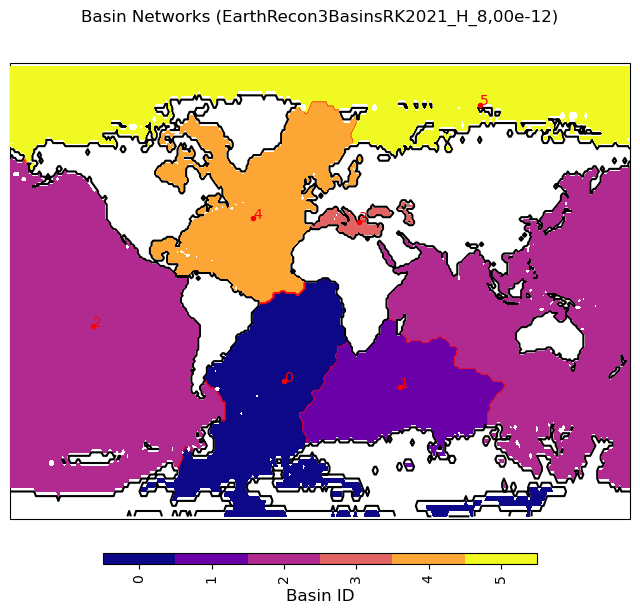

## (1/areaofBasin1)*np.nansum( areaofConnection*self.bathymetryConDist[ symmeticIndex[0], symmeticIndex[1] ]/100 )
### 6 Basins
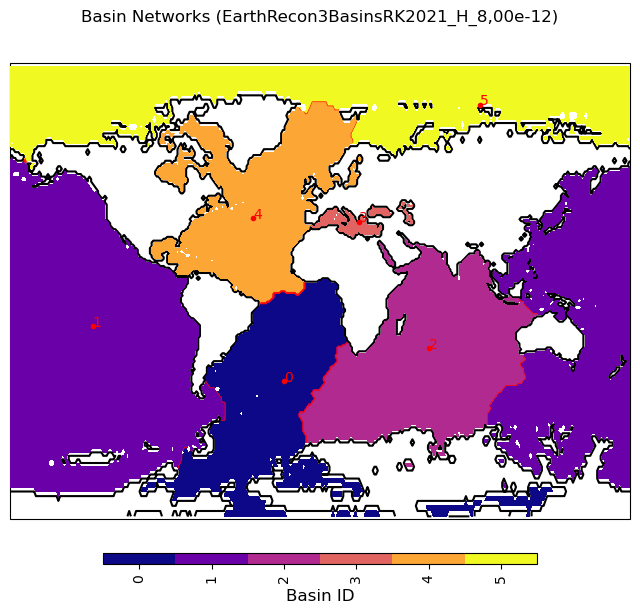

### 5 Basins
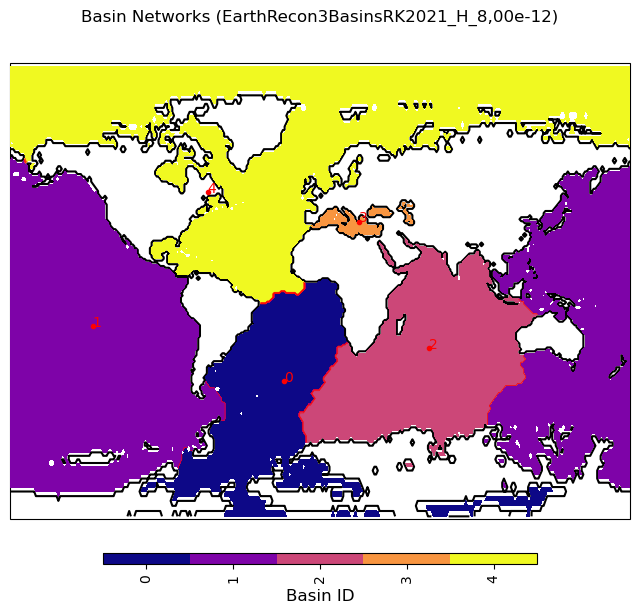

### 4 Basins
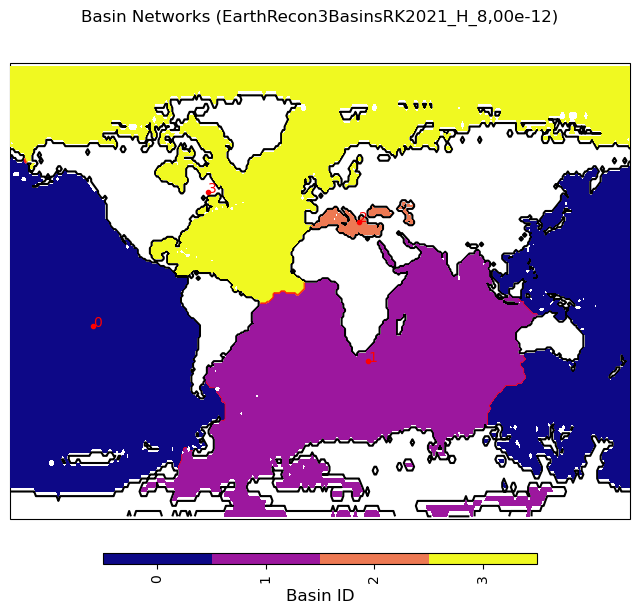

### 3 Basins
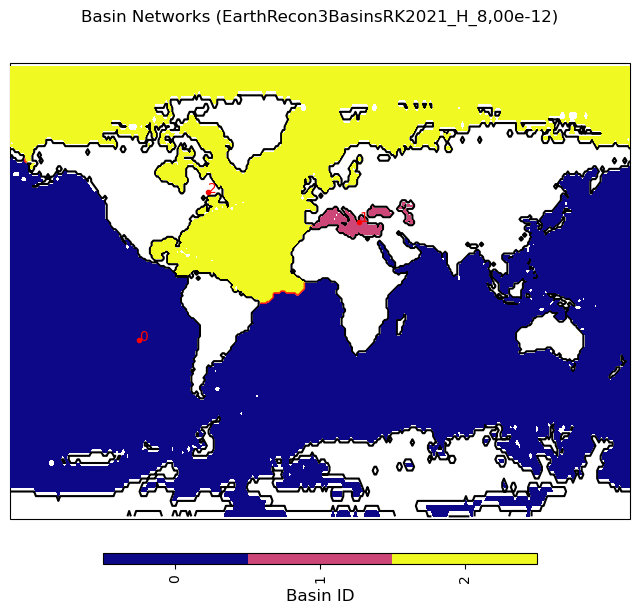


In [ ]:
# Import necessary libraries
import ExoCcycle as EC
import matplotlib as mpl
import numpy as np
import os

# Define an input directory dictionary containing all necessary
# directories for the bathymetry reconstruction and analysis.
directories = {"paleoDEMs":"/home/bogumil/Documents/data/Scotese_Wright_2018_Maps_1-88_1degX1deg_PaleoDEMS_nc/Scotese_Wright_2018_Maps_1-88_1degX1deg_PaleoDEMS_nc_v2",
               "oceanLith":"/home/bogumil/Documents/data/Muller_etal_2019_Tectonics_v2.0_netCDF",
               "etopo":"//home/bogumil/Documents/data/topo"};
## Notes on name convection of paleoDEMs and oceanLith files.
## paleoDEMs -> [prefix]_[float/int]Ma.nc
## oceanLith -> [prefix]-[float/int].nc


# Create bathymetry object for reconstructing past Earth bathymetry 
EarthReconBathy = EC.Bathymetry.BathyRecon(directories)

# Set thermal subsidence model and parameters for Rosas and Korenaga (2021)
#thermalSubParameters = {'type':"RK2021", 'H':2.1e-12, 'MORDepthkm':2.5}
#thermalSubParameters = {'type':"RK2021", 'H':4.8e-12, 'MORDepthkm':2.5}
thermalSubParameters = {'type':"RK2021", 'H':8.0e-12, 'MORDepthkm':2.5}
EarthReconBathy.setThermalMethod(thermalSubParameters, verbose=True)

# Reconstruction past Earth bathymetry from 0 to 80 Ma in 5 myr increments
# and with a resolution of 1 degree.
#EarthReconBathy.run(startMa=80, endMa=0, deltaMyr=5, resolution=1)
testAgest = 0
testAgeend = 0; # Needs to be smaller or equal to age testAgest.
EarthReconBathy.run(startMa=testAgest,
                    endMa=testAgeend,
                    deltaMyr=5,
                    resolution=1,
                    maxBasinCnt=8)

import copy as cp
x = cp.deepcopy(EarthReconBathy.basins.basinConnectionWeight);
cnt = 0
while (x >0).any():
    idx = np.argwhere(x == np.nanmax(x))[0]
    if cnt ==0:
        print("Next merge basin {0} with basin {1}".format(idx[0],idx[1]))
    else:
        print("merge basin {0} with basin {1}".format(idx[0],idx[1]))
    x[idx]=0
    cnt+=1;


# Calculate rank matrix used to determine basin connections

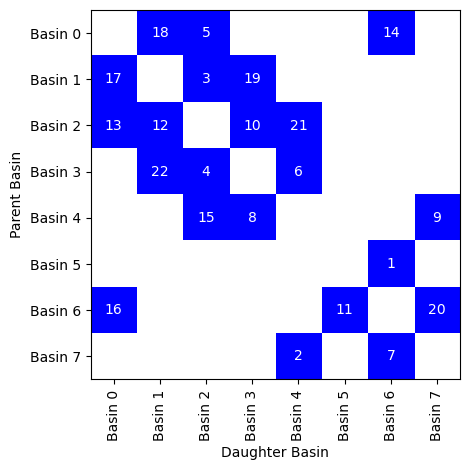

Next merge basin 1 with basin 3
merge basin 4 with basin 2
merge basin 7 with basin 6
merge basin 0 with basin 1
merge basin 5 with basin 6


In [9]:
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
import copy as cp
from scipy.stats import rankdata


data = np.random.rand(10, 10) * 20
data = np.flipud(cp.deepcopy(EarthReconBathy.basins.basinConnectionWeight).T)
tracker = np.flipud(cp.deepcopy(EarthReconBathy.basins.basinConnectionWeight).T)
rank = cp.deepcopy(data);
for i in range(np.size(rank)):
    rank[tracker==np.max(tracker)] = len(tracker[tracker!=0]);
    tracker[tracker==np.max(tracker)] = 0;
    if len(tracker[tracker!=0])==0:
        break;
    #print(len(tracker[tracker!=0]))
rank = np.flipud(rank);
    


# create discrete colormap
cmap = colors.ListedColormap(['white', 'blue'])
bounds = [0,1,1e14]
norm = colors.BoundaryNorm(bounds, cmap.N)

fig, ax = plt.subplots()
ax.imshow(data, cmap=cmap, norm=norm)

# draw gridlines
#ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
plt.xlim([-.5, EarthReconBathy.basins.basinCnt-0.5])
plt.ylim([-.5, EarthReconBathy.basins.basinCnt-0.5])


labels = ["Basin {}".format(i) for i in np.arange(EarthReconBathy.basins.basinCnt)]
ax.set_xticks(np.arange(0, EarthReconBathy.basins.basinCnt, 1), labels=labels);
ax.set_yticks(np.arange(0, EarthReconBathy.basins.basinCnt, 1), labels=labels[::-1] );
ax.set_xticklabels(labels, rotation=90)

plt.xlabel("Daughter Basin")
plt.ylabel("Parent Basin")

# Plot connection rank
xx, yy = np.meshgrid(np.arange(0, EarthReconBathy.basins.basinCnt), np.arange(0, EarthReconBathy.basins.basinCnt))
x_coords = xx.flatten()
y_coords = np.flip(yy).flatten()
values = rank.flatten()

# Create the figure and axes object
#fig, ax = plt.subplots()

# Plot the values as text, centered at the coordinates
for x, y, value in zip(x_coords, y_coords, values):
    ax.text(x, y, str(int(value)), ha='center', va='center', color='w')

# Adjust plot limits and add labels
#ax.set_xlim(0, 8)
#ax.set_ylim(0, 5)
#ax.set_xlabel("X-axis")
#ax.set_ylabel("Y-axis")
#ax.set_title("Values at Coordinates")

# Show the plot
plt.show()



rank
#EarthReconBathy.basins.basinConnectionWeight


import copy as cp
x = cp.deepcopy(EarthReconBathy.basins.basinConnectionWeight);
cnt = 0
while (x >0).any():
    idx = np.argwhere(x == np.nanmax(x))[0]
    if cnt ==0:
        print("Next merge basin {0} with basin {1}".format(idx[0],idx[1]))
    else:
        print("merge basin {0} with basin {1}".format(idx[0],idx[1]))
    x[idx]=0
    cnt+=1;


/home/bogumil/anaconda3/envs/ExoCcycle/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Ocean basin volume is constant through reconstruction period.


  0%|                                                     | 0/1 [00:00<?, ?it/s]

Check that the output has the correct sign for positive value bathymetry

The following folder(s) exists within current directory:
/bathymetries/EarthRecon3BasinsRK2021_H_2,10e-12

The following folder(s) exists within current directory:
/home/bogumil/Documents/External_fids/ExoCcycle-workspace/bathymetries, /home/bogumil/Documents/External_fids/ExoCcycle-workspace/bathymetries/EarthRecon, /home/bogumil/Documents/External_fids/ExoCcycle-workspace/bathymetries/EarthRecon3Basins, /home/bogumil/Documents/External_fids/ExoCcycle-workspace/bathymetries/EarthRecon3_4Basins


/home/bogumil/Documents/External_fids/ExoCcycle-workspace/ExoCcycle/utils.py:2714: RuntimeWarning: invalid value encountered in sqrt
  c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))


Network has not been overwritten. New network only exist within this object instance.
Network has not been overwritten. New network only exist within this object instance.
Network has not been overwritten. New network only exist within this object instance.
Network has not been overwritten. New network only exist within this object instance.
Network has not been overwritten. New network only exist within this object instance.


100%|█████████████████████████████████████████████| 1/1 [00:12<00:00, 12.40s/it]

Basin bathymetry parameters are being stored in netCDF4 group CycleParms
Basin connectivity bathymetry parameters are being stored in netCDF4 group basinConnections
Group	Variable			Dimensions				Shape
--------------------------------------------------------------------------------------
Arrays
	lat                      	('lat',)                           	(180,)                             
	lon                      	('lon',)                           	(360,)                             
	bathymetry               	('lat', 'lon')                     	(180, 360)                         
	basinIDArray             	('lat', 'lon')                     	(180, 360)                         
	areaWeights              	('lat',)                           	(180,)                             
CycleParms
	binEdges                 	('binEdges',)                      	(13,)                              
	Global-whighlat          	('binEdges',)                      	(13,)                              


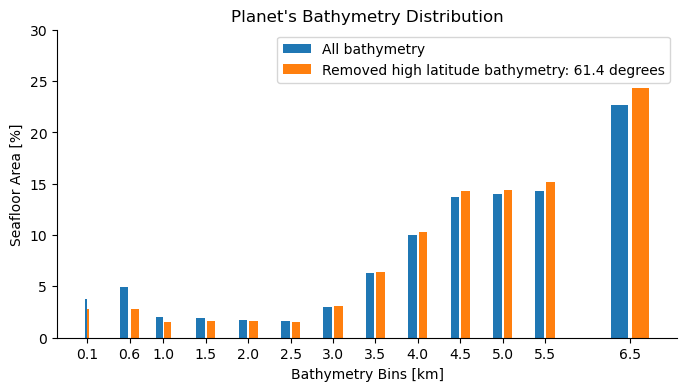

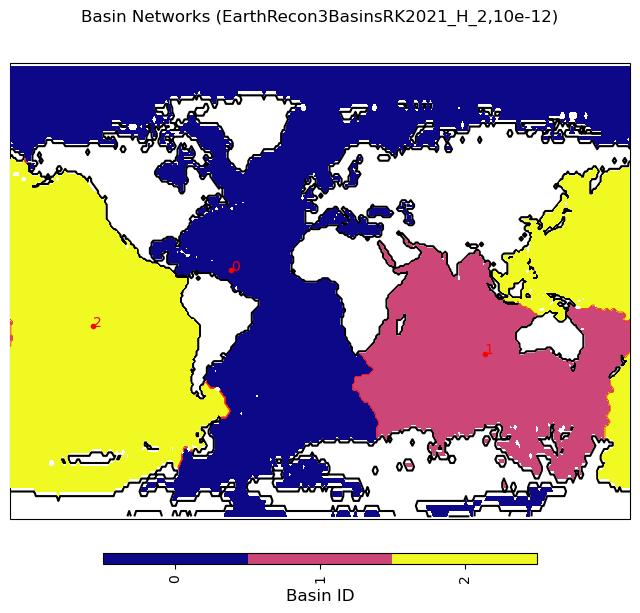

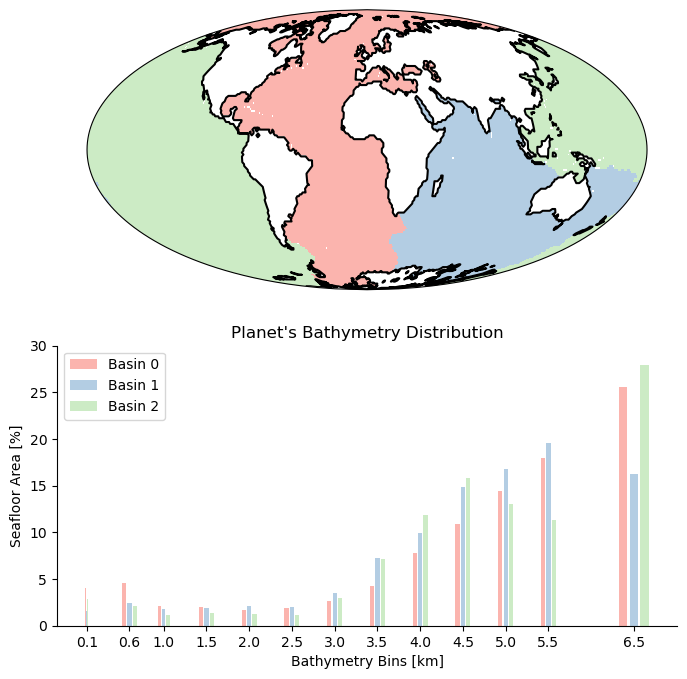

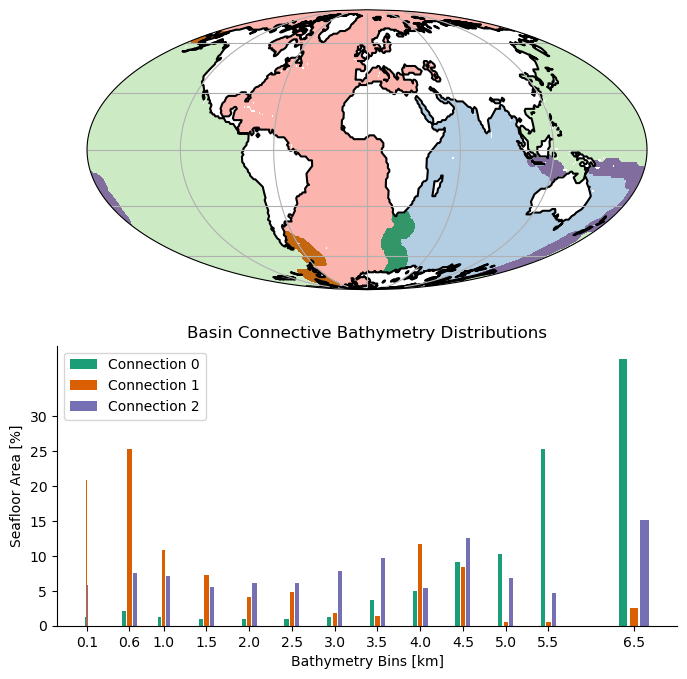

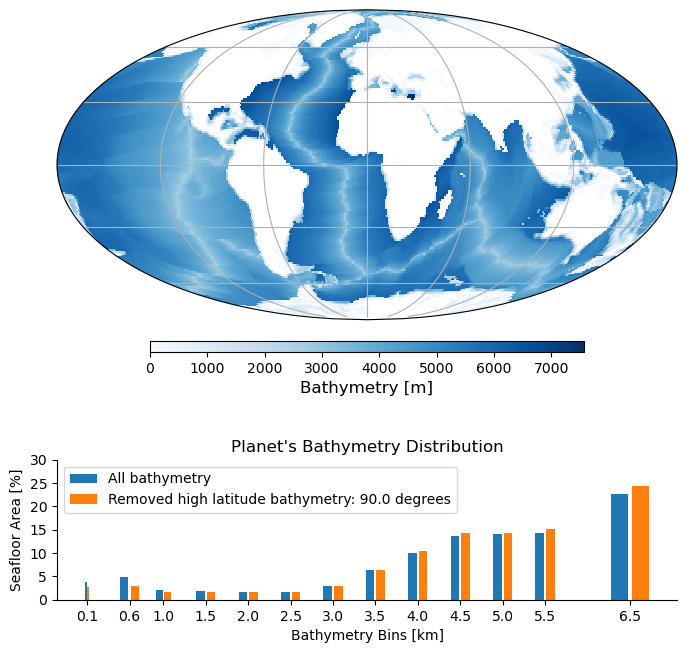

In [1]:
# Import necessary libraries
import ExoCcycle as EC
import matplotlib as mpl
import numpy as np
import os

# Define an input directory dictionary containing all necessary
# directories for the bathymetry reconstruction and analysis.
directories = {"paleoDEMs":"/home/bogumil/Documents/data/Scotese_Wright_2018_Maps_1-88_1degX1deg_PaleoDEMS_nc/Scotese_Wright_2018_Maps_1-88_1degX1deg_PaleoDEMS_nc_v2",
               "oceanLith":"/home/bogumil/Documents/data/Muller_etal_2019_Tectonics_v2.0_netCDF",
               "etopo":"//home/bogumil/Documents/data/topo"};
## Notes on name convection of paleoDEMs and oceanLith files.
## paleoDEMs -> [prefix]_[float/int]Ma.nc
## oceanLith -> [prefix]-[float/int].nc


# Create bathymetry object for reconstructing past Earth bathymetry 
EarthReconBathy = EC.Bathymetry.BathyRecon(directories)

# Set thermal subsidence model and parameters for Rosas and Korenaga (2021)
thermalSubParameters = {'type':"RK2021", 'H':2.1e-12, 'MORDepthkm':2.5}
EarthReconBathy.setThermalMethod(thermalSubParameters, verbose=True)

# Reconstruction past Earth bathymetry from 0 to 80 Ma in 5 myr increments
# and with a resolution of 1 degree.
#EarthReconBathy.run(startMa=80, endMa=0, deltaMyr=5, resolution=1)
testAgest = 0
testAgeend = 0; # Needs to be smaller or equal to age testAgest.
EarthReconBathy.run(startMa=testAgest, endMa=testAgeend, deltaMyr=5, resolution=1)


